# Equipment Losses: Data Analysis
Data info:
- It contains two data file-
- One dataset is for Machinary Equiment - have 10 columns and 34 rows
- The other dataset is for personal losses- have 5 columns and 34 rows

In [61]:
# Importing libraries pandas and numpy
import pandas as pd
import numpy as np

In [62]:
# Importing seaborn and matplotlib 
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [63]:
# Setting the size of the plots/Figures
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 14)

### Loading In data

In [64]:
# Loading the datasets and priviewing the first 5 records
# A funtion that will help in reading the two data sets


def reading(type,path):
  if type == 'excel':
    df = pd.read_excel(path)
  elif type == 'csv':
    df = pd.read_csv(path)
  return df

In [65]:
equipment = reading("csv", 'russia_losses_equipment.csv')
equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [66]:
personnel = reading('csv', 'russia_losses_personnel.csv')
personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [67]:
# Checking the datasets size, shape and info

def size_shape(data):
    return data.info(), data.shape, data.size


In [68]:
size_shape(personnel)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        49 non-null     object
 1   day         49 non-null     int64 
 2   personnel   49 non-null     int64 
 3   personnel*  49 non-null     object
 4   POW         49 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


(None, (49, 5), 245)

In [69]:
size_shape(equipment)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   49 non-null     object 
 1   day                    49 non-null     int64  
 2   aircraft               49 non-null     int64  
 3   helicopter             49 non-null     int64  
 4   tank                   49 non-null     int64  
 5   APC                    49 non-null     int64  
 6   field artillery        49 non-null     int64  
 7   MRL                    49 non-null     int64  
 8   military auto          49 non-null     int64  
 9   fuel tank              49 non-null     int64  
 10  drone                  49 non-null     int64  
 11  naval ship             49 non-null     int64  
 12  anti-aircraft warfare  49 non-null     int64  
 13  special equipment      30 non-null     float64
 14  mobile SRBM system     20 non-null     float64
dtypes: float

(None, (49, 15), 735)

### Data Cleaning

In [70]:
#Droping unused column in personnel dataset

personnel.drop(columns='day', inplace= True)

In [71]:
#Checking and dealing with null values in personnel dataset

personnel.isna().sum()

date          0
personnel     0
personnel*    0
POW           0
dtype: int64

In [72]:
#Checking and dealing with null values in equipment dataset

equipment.isna().sum()

equipment.fillna(0, inplace=True)

equipment.isna().sum()

date                     0
day                      0
aircraft                 0
helicopter               0
tank                     0
APC                      0
field artillery          0
MRL                      0
military auto            0
fuel tank                0
drone                    0
naval ship               0
anti-aircraft warfare    0
special equipment        0
mobile SRBM system       0
dtype: int64

In [73]:
#Checking and dealing with duplicate values in personel dataset
personnel.duplicated().sum()

0

In [74]:
#Checking and dealing with duplicate values in equipment dataset
equipment.duplicated().sum()

0

### Merging Datasets

In [75]:

ukraine =equipment.merge(personnel, on='date')
ukraine.round(4)


,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0.0,0.0,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,0.0,0.0,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,0.0,0.0,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0.0,0.0,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0.0,0.0,5710,about,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,0.0,0.0,5840,about,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,0.0,0.0,9000,about,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,0.0,0.0,9166,about,200
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,0.0,0.0,10000,about,216
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,0.0,0.0,11000,about,232


### Analysis


In [76]:
ukraine.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,POW
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,26.00000,95.367347,100.204082,473.571429,1431.346939,221.714286,74.877551,880.408163,67.142857,46.510204,4.510204,39.306122,12.306122,1.591837,14100.326531,360.000000
std,14.28869,47.024237,40.752801,191.326183,410.848084,104.342185,30.925066,414.016451,7.497222,45.091630,2.161427,18.538478,10.778459,1.957021,4645.526636,136.218268
min,2.00000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2800.000000,0.000000
25%,14.00000,49.000000,81.000000,317.000000,1070.000000,120.000000,56.000000,482.000000,60.000000,7.000000,3.000000,28.000000,0.000000,0.000000,12000.000000,360.000000
50%,26.00000,97.000000,121.000000,498.000000,1535.000000,240.000000,80.000000,969.000000,60.000000,24.000000,3.000000,45.000000,13.000000,0.000000,15000.000000,405.000000
75%,38.00000,143.000000,134.000000,631.000000,1776.000000,317.000000,100.000000,1236.000000,76.000000,87.000000,7.000000,54.000000,24.000000,4.000000,17700.000000,460.000000
max,50.00000,160.000000,144.000000,753.000000,1968.000000,366.000000,122.000000,1437.000000,76.000000,134.000000,7.000000,64.000000,25.000000,4.000000,19900.000000,477.000000


In [77]:
cor_matrix = ukraine.corr()
cor_matrix

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,POW
day,1.000000,0.990546,0.930177,0.993115,0.983789,0.981949,0.967602,0.986490,0.905675,0.952907,0.922809,0.948112,0.952589,0.856779,0.958838,0.848648
aircraft,0.990546,1.000000,0.946694,0.991984,0.989881,0.988747,0.962627,0.990521,0.907636,0.929717,0.928899,0.956006,0.965052,0.854670,0.957841,0.851903
helicopter,0.930177,0.946694,1.000000,0.959212,0.971383,0.946638,0.951807,0.958047,0.783506,0.789747,0.828492,0.987237,0.881087,0.693298,0.971707,0.934924
tank,0.993115,0.991984,0.959212,1.000000,0.995936,0.987578,0.983195,0.994432,0.888908,0.918902,0.913244,0.972895,0.946950,0.827450,0.979785,0.890381
APC,0.983789,0.989881,0.971383,0.995936,1.000000,0.987878,0.981537,0.996109,0.872845,0.894077,0.895822,0.979422,0.945695,0.802588,0.979761,0.899811
field artillery,0.981949,0.988747,0.946638,0.987578,0.987878,1.000000,0.965500,0.995132,0.921509,0.922095,0.925341,0.957982,0.977756,0.837444,0.957153,0.844695
MRL,0.967602,0.962627,0.951807,0.983195,0.981537,0.965500,1.000000,0.977814,0.846432,0.873636,0.882694,0.977661,0.903639,0.790893,0.988371,0.926233
military auto,0.986490,0.990521,0.958047,0.994432,0.996109,0.995132,0.977814,1.000000,0.892667,0.911415,0.909628,0.970510,0.964457,0.823167,0.970883,0.875287
fuel tank,0.905675,0.907636,0.783506,0.888908,0.872845,0.921509,0.846432,0.892667,1.000000,0.948571,0.953207,0.801912,0.944583,0.909964,0.822294,0.652157
drone,0.952907,0.929717,0.789747,0.918902,0.894077,0.922095,0.873636,0.911415,0.948571,1.000000,0.935029,0.819929,0.934436,0.921722,0.847688,0.674533


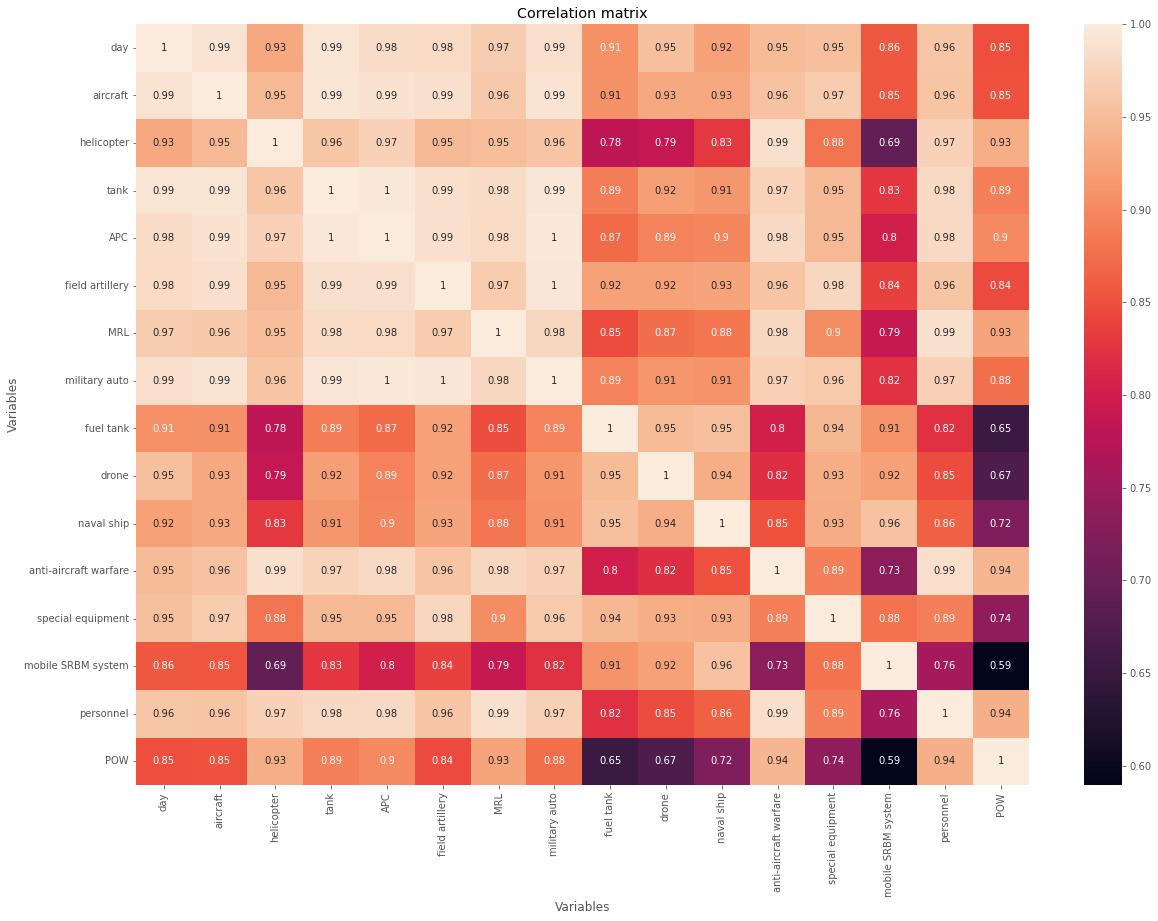

In [78]:
sns.heatmap(cor_matrix, annot=True)
plt.title("Correlation matrix")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [79]:
cols = ['aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'personnel', 'POW']


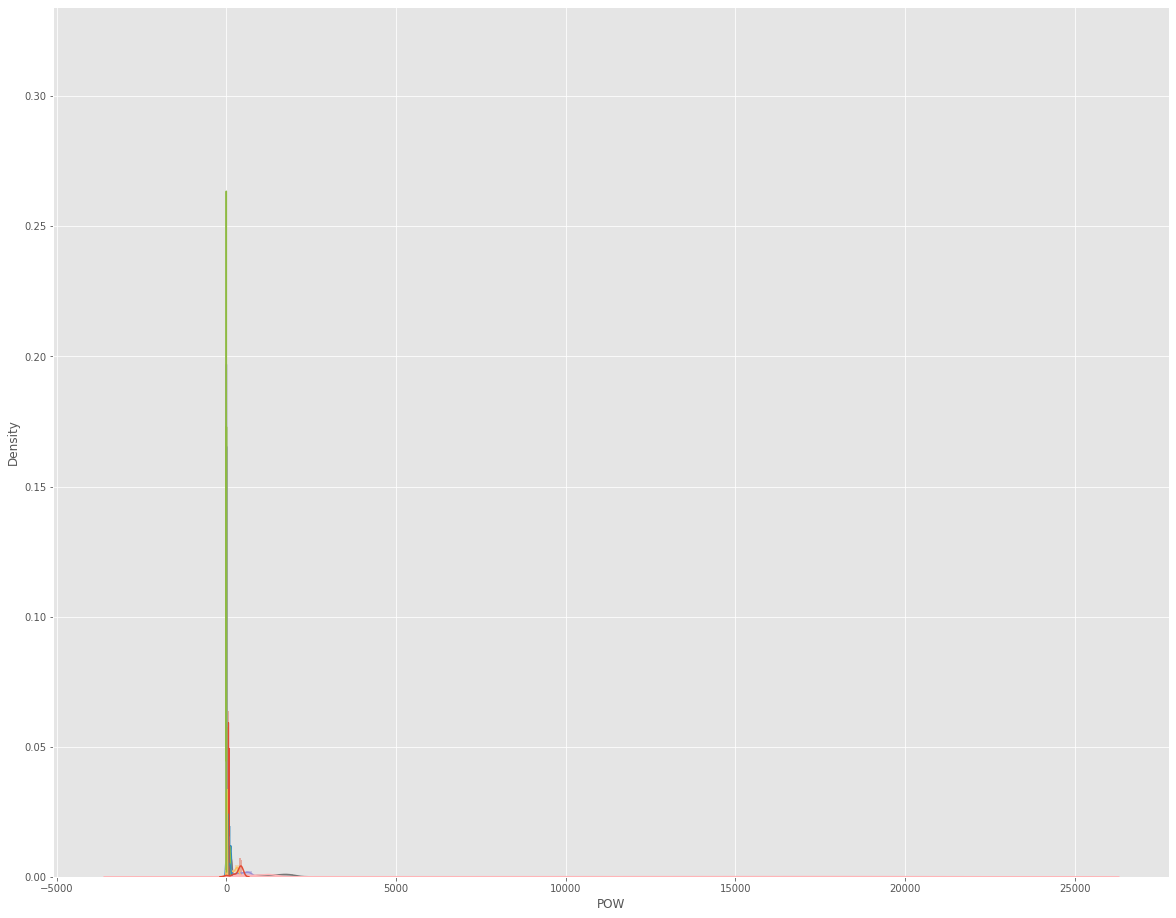

In [80]:
plt.figure(figsize=(20,16))
for col in cols:
    sns.distplot(ukraine[col])

In [81]:
import plotly.figure_factory as ff
hist_data = []
group_labels = []

for Col in cols:
    hist_data.append(ukraine[col])
    group_labels.append(col)

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[.1, .25, .5, 1,.1, .25, .5, 1,.1, .25, .5, 1,.1, .25, .5, 1,1, .25, .5, 1,.1])
fig.show()

In [82]:

import plotly.graph_objects as go

# Create traces
fig = go.Figure()
for col in cols:
    fig.add_trace(go.Scatter(x=ukraine['date'], y=ukraine[col], mode='lines+markers',name=col,))

fig.show()

In [83]:
fig = go.Figure()
for col in cols:
    fig.add_trace(go.Scatter(x=ukraine['day'], y=ukraine[col], mode='lines',name=col,))

fig.show()

In [84]:
ukraine.sort_values(by='aircraft',ascending=False).head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
48,2022-04-14,50,160,144,753,1968,366,122,1437,76,134,7,64,25.0,4.0,19900,about,477
47,2022-04-13,49,158,143,739,1964,358,115,1429,76,132,7,64,25.0,4.0,19800,about,477
46,2022-04-12,48,157,140,732,1946,349,111,1406,76,124,7,63,25.0,4.0,19600,about,477
45,2022-04-11,47,154,137,725,1923,347,111,1387,76,119,7,55,25.0,4.0,19500,about,467
44,2022-04-10,46,152,137,722,1911,342,108,1384,76,112,7,55,25.0,4.0,19300,about,467
43,2022-04-09,45,151,136,705,1895,335,108,1363,76,112,7,55,25.0,4.0,19100,about,467
42,2022-04-08,44,150,135,700,1891,333,108,1361,76,112,7,55,25.0,4.0,19000,about,467
41,2022-04-07,43,150,135,698,1891,332,108,1358,76,111,7,55,25.0,4.0,18900,about,467
40,2022-04-06,42,150,135,684,1861,332,107,1324,76,96,7,55,25.0,4.0,18600,about,467
39,2022-04-05,41,150,134,676,1858,332,107,1322,76,94,7,55,25.0,4.0,18500,about,467


In [96]:
#Totals per equipment and personnel
totals = ukraine.drop(columns=['date', 'day', 'personnel*'])

df_tot = []

tot = totals.sum().sort_values(ascending = False)

for i in tot:
    df_tot.append(i)


print(df_tot)

totals.columns
df_total = pd.DataFrame(df_tot, index=totals.columns).reset_index()
df_total.columns=['Equipemnt', 'Loses']
df_total.to_excel('Totals.xlsx')

[690916.0, 70136.0, 43140.0, 23205.0, 17640.0, 10864.0, 4910.0, 4673.0, 3669.0, 3290.0, 2279.0, 1926.0, 603.0, 221.0, 78.0]


In [47]:

totals.sum().sort_values(ascending = False)

personnel                690916.0
APC                       70136.0
military auto             43140.0
tank                      23205.0
POW                       17640.0
field artillery           10864.0
helicopter                 4910.0
aircraft                   4673.0
MRL                        3669.0
fuel tank                  3290.0
drone                      2279.0
anti-aircraft warfare      1926.0
special equipment           603.0
naval ship                  221.0
mobile SRBM system           78.0
dtype: float64

Text(0.5, 1.0, 'Destroyed Equepments & Personal Losses')

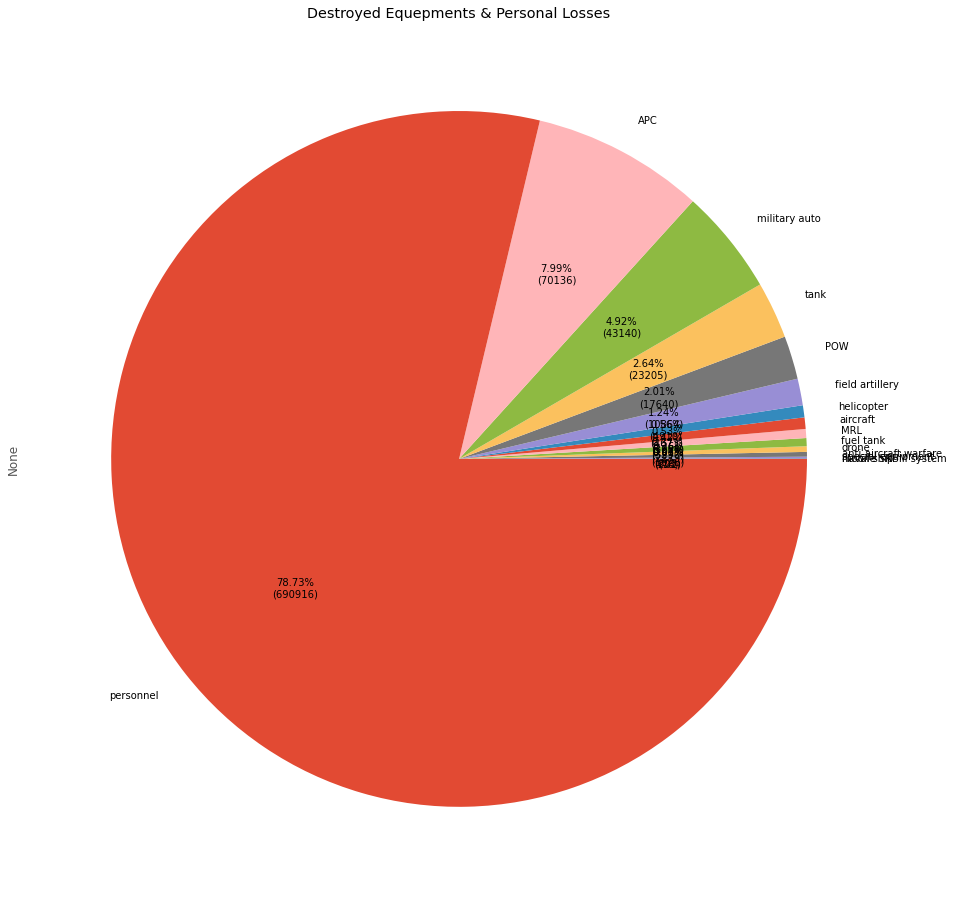

In [44]:

plt.figure(figsize=(16,16))
totals.sum().sort_values().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(totals.sum().sort_values().sum())))
plt.title('Destroyed Equepments & Personal Losses')

In [42]:
def num2MB(num):
    '''
        num: int, float
        it will return values like thousands(10K), Millions(10M),Billions(1B)
        '''
    if num < 1000: return int(num)
    if num >= 1000 and num < 1000000:return f'{float("%.1f" %(num/1000))}K'
    elif num>= 1000000 and num < 1000000000: return f'{float("%.1f" %(num/1000000))}M'
    else: return f'{float("%.1f" %(num/1000000000))}B'

def myBarPlot(data,data2=None,title=None,x_pos=0.25,y_pos=10,val_per=None):
    '''
    data: data
    data2: hue data
    title: str- title of graph
    x_pos: int/float - to adjust x-axis position of text
    y_pos=10: int/float - to adjust y-axis position of text
    val_per: default: None- nothing print
            'value': to print actual value on top
            'percent': to print in percent
            'val_per': to print both value and percent
    
    '''

    total_data = data.shape[0] # total no of rows in data
    
    ax = sns.barplot(data,data2)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)      
        a = height
        x = i.get_x() # get x_axis value
        b = 0
        if val_per == 'value':
            b = num2MB(a)
        elif val_per == "percent":
            b = '{:.2f}%'.format((a/total_data)*100)
        elif val_per == 'val_per':
            b = '{}\n{:.2f}%'.format(num2MB(a),(a/total_data)*100)
        else:
            b = ''

        ax.text(x=x+x_pos,y=height+y_pos,s=b,rotation=None) # shift+tab for more parameter
    plt.title(title,fontdict={'fontsize':20,'color':'red'})
    plt.xticks(rotation=90)

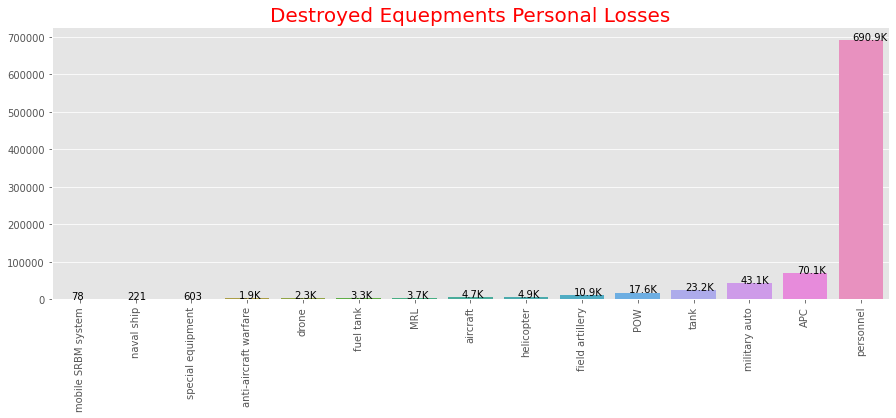

In [45]:
plt.figure(figsize=(15,5))
myBarPlot(totals.sum().sort_values().index,totals.sum().sort_values().values,val_per='value', title='Destroyed Equepments Personal Losses')

In [51]:
#Personnel lost
fig = go.Figure()

fig.add_trace(go.Scatter(x=ukraine['date'], y=ukraine['personnel'], mode='lines+markers',name=col,))

fig.show()

In [61]:
#
fig = px.line(ukraine, x='date', y='POW', color='POW', symbol="POW")

fig.show()

### Inferences
- its clear that there is a high peak on losses both financial and personal, since the start of war
- There is also a linear short of relation between day and euipments as well as day personal losses.